In [1]:
from data import df_columns, data

In [2]:
import matplotlib.pyplot as plt

def create_bar_chart(x, y, xlabel, ylabel, title=""):
    h = plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0, max(y) + 10)
    plt.title(title)
    
    for i in range(len(x)):
        year_value, count = x[i], y[i]
        plt.text(year_value, count+2, str(count), ha='center')

    plt.show()
    

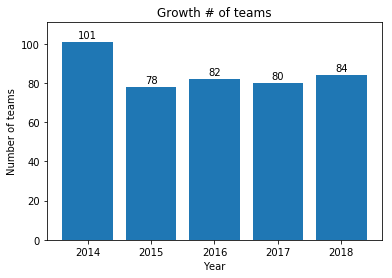

In [3]:
years = list(data.keys())
number_of_teams = [len(value) for key, value in data.items()]
create_bar_chart(years, number_of_teams, "Year", "Number of teams", "Growth # of teams")

In [4]:
print("How each row looks like?")
print(data[2017][0])
print(data[2017][30])
# team_ranking, university_name_team_name, solved, penalty, dont_know, submissions...

How each row looks like?
[1, 'Sharif University of Technology: Cliché\n', 9, 1206, 77, ['1/4', 'yes'], ['1/9', 'yes'], ['1/--', 'no'], ['1/171', 'yes'], ['2/27', 'yes first'], 0, ['1/241', 'yes'], ['1/37', 'yes first'], ['2/261', 'yes'], ['3/229', 'yes'], ['3/107', 'yes first'], ['16/9', '']]
[15, 'Kharazmi University: Bits Please.\n', 3, 385, 35, ['1/3', 'yes'], ['2/24', 'yes'], 0, ['1/--', 'no'], ['6/--', 'no'], 0, 0, ['4/278', 'yes'], 0, 0, 0, ['14/3', '']]


In [5]:
def get_attempts(s):
    return int(s.split('/')[0])

def get_accept_time(s):
    accept_time = s.split('/')[1]
    if accept_time.isdigit():
        return int(accept_time)
    else:
        return 0

def get_name(s):
    s = s.strip()
    point_idx = s.strip().find(':')
    return s[point_idx+2:].strip()

def get_university(s):
    s = s.strip()
    point_idx = s.strip().find(':')
    return s[:point_idx].strip()
    
class Submission:
    def __init__(self, sub):
        if sub == 0:
            self.accepted = False
            self.attempts = 0
            self.accept_time = 0
        else:
            self.accepted = sub[1] != 'no'
            self.attempts = get_attempts(sub[0])
            self.accept_time = get_accept_time(sub[0])
            
    def get_accept_time(self):
        return self.accept_time
            
    def __str__(self):
        return "Attempts:{}, Accepted:{}, Accept Time:{}".format(self.attempts, self.accepted, self.accept_time)
    
class Team:
    def __init__(self, row):
        self.ranking = row[0]
        self.name = get_name(row[1])
        self.university = get_university(row[1])
        self.solved = row[2]
        self.penalty = row[3]
        self.submissions = [Submission(x) for x in row[5:]]
        
    def __str__(self):
        return self.name
    
    def set_name(self, name):
        self.name = name
        
    def get_name(self):
        return self.name
        
    def set_university(self, university):
        self.university = university
    
    def get_university(self):
        return self.university
    
    def get_solved(self):
        return self.solved
    
    def get_penalty(self):
        return self.penalty
    
    def get_submissions(self):
        return self.submissions

In [6]:
s1 = Submission(["1/8", 'yes'])
s2 = Submission(["10/--", 'no'])
print(s1)
print(s2)

Attempts:1, Accepted:True, Accept Time:8
Attempts:10, Accepted:False, Accept Time:0


In [7]:
t1 = Team([15, 'Kharazmi University: Bits Please.\n', 3, 385, 35, ['1/3', 'yes'], ['2/24', 'yes'], 0, ['1/--', 'no'], ['6/--', 'no'], 0, 0, ['4/278', 'yes'], 0, 0, 0, ['14/3', '']])
print(t1)

Bits Please.


In [8]:
import pandas as pd

class Contest:
    def __init__(self, year, teams):
        self.year = year
        self.teams = [Team(t) for t in teams]
    
    def __str__(self):
        return str(self.year)
    
    def get_unique_university_names(self):
        return {t.university for t in self.teams}
    
    def get_year(self):
        return self.year
    
    def update_university_names(self, university_name_handler):
        for t in self.teams:
            t.set_university(university_name_handler(t.get_university()))
    
    def __repr__(self):
        return str(self.year) + " -> " + str([str(t) for t in self.teams]) + "\n"
    
    def get_df(self):
        df = pd.DataFrame(columns=df_columns)
        team_ranking = 1
        for t in self.teams:
            team_data = {'year':[self.year], 'ranking': [team_ranking], 'name': [t.get_name()], 'university': [t.get_university()], 'solved': [t.get_solved()], 
                        'penalty': [t.get_penalty()]}
            problem = 'a'
            for s in t.get_submissions():
                team_data["p{}_time".format(problem)] = [s.get_accept_time()]
                problem = chr(ord(problem) + 1)
                
            df = df.append(pd.DataFrame(data=team_data, columns=df_columns), ignore_index=True)            
            team_ranking += 1
            
        print(df.head())
        
        return df
        

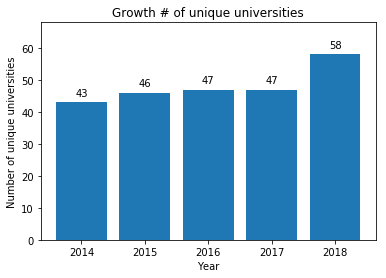

In [9]:
contests = [Contest(year=key, teams=value) for key, value in data.items()]
years = [c.get_year() for c in contests]
nunique_universities = [len(c.get_unique_university_names()) for c in contests]
create_bar_chart(years, nunique_universities, "Year", "Number of unique universities", "Growth # of unique universities")

In [10]:
# printing all university names, for further exploration and removing duplicate names

all_universities = []
for c in contests:
    all_universities.extend( list(c.get_unique_university_names()) )
all_universities = set(all_universities)

#for t in sorted(all_universities):
#    print("['{}'],".format(t))


In [11]:
from universities import universities
print("Number of unique universities over years : {}".format(len(universities)))

Number of unique universities over years : 84


In [12]:
# updating all university names
from universities import get_university_name
for c in contests:    
    c.update_university_names(get_university_name)
    print(sorted(c.get_unique_university_names())[:5])


True
['Alzahra University', 'Amirkabir University of Technology', 'Azad U of Tehran Center', 'Azad U of Tehran South', 'Azarbijan Shahid Madani U']
False
False
['Alzahra University', 'Amirkabir University of Technology', 'Birjand University', 'Bu-Ali Sina University', 'Ferdowsi University of Mashhad']
False
False
['Alzahra University', 'Amirkabir University of Technology', 'Birjand University', 'Bu-Ali Sina University', 'Fasa University']
False
False
['Alzahra University', 'Amirkabir University of Technology', 'Ardabil Technical and Vocational University', 'Bonab Faculty of Engineering', 'Bu-Ali Sina University']
False
False
['Ale-Taha Institute Of Higher Education', 'Alzahra University', 'Amirkabir University of Technology', 'Azad University of Lahijan', 'Babol University of Technology']
False


In [13]:
# creating a csv from all the data to be used by DataFrame from now on
import pandas as pd
df = pd.DataFrame(columns=df_columns)
for c in contests:
    df = df.append(c.get_df(), ignore_index=True)
df.to_csv("standings_data.csv", index=False)

   year ranking              name                       university solved  \
0  2014       1            Saboon  Sharif University of Technology     10   
1  2014       2     We miss iliad  Sharif University of Technology      9   
2  2014       3         Shire Aab  Sharif University of Technology      9   
3  2014       4  Carrots in Black  Sharif University of Technology      8   
4  2014       5             iliad  Sharif University of Technology      8   

  penalty pa_time pb_time pc_time pd_time pe_time pf_time pg_time ph_time  \
0    1080       2       9      96      16     111      29      93     261   
1    1035       2      28     165      20     141      77      54       0   
2    1123       4      11      51      47     234      16     129     175   
3     748       3      19      70      35     235     117      95       0   
4     751       5      13      39      21     240      66      50     237   

  pi_time pj_time pk_time pl_time pm_time pn_time  
0     179     144     

In [14]:
from universities import get_university_name

print(get_university_name('U of Tehran Eng'))
print(get_university_name('Fasa U'))


University of Tehran
Fasa University
